## Install arima

In [ ]:
pip install pmdarima

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st
%matplotlib inline
#from statsmodels.tsa.seasonal import seasonal_decompose

## read dataset

In [2]:
df=pd.read_csv('C:/Users/SRTINNI/Desktop/covid.csv',index_col='DATE'   ,parse_dates=True)
#df=pd.read_csv('C:/Users/SRTINNI/Desktop/covid.csv')
df=df.dropna()
print('Shape of data',df.shape)
df.head()
#df.describe()


Shape of data (660, 1)


,Daily new cases
DATE,
2020-08-03,3.0
2020-09-03,0.0
2020-10-03,0.0
2020-11-03,0.0
2020-12-03,0.0


## plot dataset

Text(0.5, 1.0, 'Daily new cases w.r.to days[year-month]')

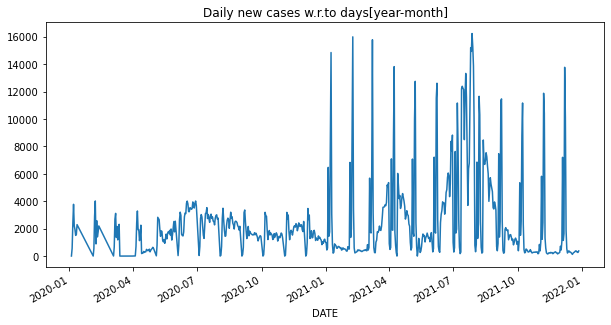

In [4]:
dp=df['Daily new cases'].plot(figsize=(10,5))

dp.set_title("Daily new cases w.r.to days[year-month]")

In [129]:
#https://www.sfu.ca/~mjbrydon/tutorials/BAinPy/03_visualization.html >> plot visuality
#sns.histplot(x=df['Daily new cases'],bins=10, kde=True)
#sns.histplot(x=df['Daily new cases'],bins=10, kde=False, stat="probability", color='green' )
#sns.boxplot(x=df['Daily new cases']);

## check for stationarity: by ADF and KPSS method respectively

In [130]:
#from statsmodels.tsa.stattools import adfuller
#def ad_test(dataset):
 #    dftest = adfuller(dataset, autolag = 'AIC')
  #   print("1. ADF : ",dftest[0])
   #  print("2. P-Value : ", dftest[1])
    # print("3. Num Of Lags : ", dftest[2])
     #print("4. Num Of Observations Used For ADF Regression:",      dftest[3])
     #print("5. Critical Values :")
     #for key, val in dftest[4].items():
      #   print("\t",key, ": ", val)
    
    # ADF Test
# Function to print out results in customised manner
from statsmodels.tsa.stattools import adfuller
def adf_test(timeseries):
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)

In [131]:
#ad_test(df['Daily new cases'])

# Call the function and run the test

adf_test(df['Daily new cases'])

Results of Dickey-Fuller Test:
Test Statistic                  -3.121773
p-value                          0.024983
#Lags Used                      20.000000
Number of Observations Used    639.000000
Critical Value (1%)             -3.440625
Critical Value (5%)             -2.866074
Critical Value (10%)            -2.569184
dtype: float64


## For ADF: If p-value<0.05,the series is stationary

In [132]:
# Function to print out results in customised manner
from statsmodels.tsa.stattools import kpss

In [133]:
def kpss_test(timeseries):
    print ('Results of KPSS Test:')
    kpsstest = kpss(timeseries, regression='c', nlags="auto")
    kpss_output = pd.Series(kpsstest[0:3], index=['Test Statistic','p-value','#Lags Used'])
    for key,value in kpsstest[3].items():
        kpss_output['Critical Value (%s)'%key] = value
    print (kpss_output)

In [134]:
# Call the function and run the test
kpss_test(df['Daily new cases'])

Results of KPSS Test:
Test Statistic            0.409679
p-value                   0.072983
#Lags Used               16.000000
Critical Value (10%)      0.347000
Critical Value (5%)       0.463000
Critical Value (2.5%)     0.574000
Critical Value (1%)       0.739000
dtype: float64


## For KPSS: If p-value>0.05, then series is stationary

### Case-I: If ADF= stationary and KPSS=stationary, then series is stationary
### Case-II: If ADF= non-stationary and KPSS=non-stationary,then series is non-stationary
### Case-III: If ADF= non-stationary and KPSS=stationary, series is trend stationary
### Case-IV: If ADF= stationary and KPSS=non-stationary, series is difference stationary

### Here this series is trend-stationary

## Detrend This series 

In [135]:
#df.head()
#interated of order 1
#df_detrend_diff=df.diff(periods=1)
#df_detrend_diff = df_detrend_diff[1:]
#df_detrend_diff.head()
#df_detrend_diff['Daily new cases'].plot(figsize=(12,5))

In [136]:
from pmdarima import auto_arima
#ignore warnings
import warnings
warnings.filterwarnings("ignore") 

#### find best suited model of arima

In [137]:
stepwise_fit = auto_arima(df['Daily new cases'], trace=True,suppress_warnings=True)
#stepwise_fit.summery()

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=10427.177, Time=1.00 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=10502.034, Time=0.03 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=10503.898, Time=0.05 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=10503.863, Time=0.08 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=10500.035, Time=0.02 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.87 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=10477.492, Time=0.26 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=10407.470, Time=1.18 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=10472.740, Time=0.28 sec
 ARIMA(4,1,2)(0,0,0)[0] intercept   : AIC=10463.954, Time=0.75 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=10399.567, Time=1.31 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=10407.402, Time=1.21 sec
 ARIMA(4,1,3)(0,0,0)[0] intercept   : AIC=10408.285, Time=1.65 sec
 ARIMA(3,1,4)(0,0,0)[0] intercept   : AIC=10388.757, Time=1.56 sec
 ARIMA(2,1,4)(0,0,0)[0] i

In [138]:
from statsmodels.tsa.arima_model import ARIMA

## split dataset into train and test

In [139]:
print(df.shape)
train=df.iloc[:-39]
test=df.iloc[-39:]
print(train.shape,test.shape)

(660, 1)
(621, 1) (39, 1)


### fit the model

In [140]:
from statsmodels.tsa.arima.model import ARIMA
model=ARIMA(train['Daily new cases'],order=(5,1,5))
model=model.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:        Daily new cases   No. Observations:                  621
Model:                 ARIMA(5, 1, 5)   Log Likelihood               -4839.121
Date:                Fri, 04 Mar 2022   AIC                           9700.242
Time:                        00:28:55   BIC                           9748.969
Sample:                             0   HQIC                          9719.182
                                - 621                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3494      0.081      4.318      0.000       0.191       0.508
ar.L2         -1.0656      0.055    -19.254      0.000      -1.174      -0.957
ar.L3          0.1980      0.114      1.738      0.082      -0.025       0.421
ar.L4         -0.6514      0.055    -11.749      0.000      -0.760      -0.543
ar.L5         -0.3180      0.079     -4.013      0.000      -0.473      -0.163
ma.L1         -0.4357      0.078     -5.608      0.000      -0.588      -0.283
ma.L2          1.1573      0.047     24.461      0.000       1.065       1.250
ma.L3         -0.5032      0.108     -4.668      0.000      -0.714      -0.292
ma.L4          0.8141      0.048     17.011      0.000       0.720       0.908
ma.L5         -0.0971      0.082     -1.186      0.236      -0.257       0.063
sigma2      4.452e+05   1.15e+04     38.589      0.000    4.23e+05    4.68e+05
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):              8444.74
Prob(Q):                              0.96   Prob(JB):                         0.00
Heteroskedasticity (H):               9.92   Skew:                            -0.62
Prob(H) (two-sided):                  0.00   Kurtosis:                        21.04
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [141]:
start=len(train)
#end=len(train)+len(test)-1
end=len(train)+len(test)-1
pred=model.predict(start=start,end=end,typ='levels').rename('ARIMA Predictions')

pred.index=df.index[start:end+1]
print(pred)

DATE
2021-11-19    226.567001
2021-11-20    242.350226
2021-11-21    244.995700
2021-11-22    232.375075
2021-11-23    245.309515
2021-11-24    259.062639
2021-11-25    240.843701
2021-11-26    229.764343
2021-11-27    243.617938
2021-11-28    243.584728
2021-11-29    234.112109
2021-11-30    246.591759
2021-01-12    255.537737
2021-02-12    239.105790
2021-03-12    232.484281
2021-04-12    244.334568
2021-05-12    242.481125
2021-06-12    235.754436
2021-07-12    247.264223
2021-08-12    252.472372
2021-09-12    238.134464
2021-10-12    234.825585
2021-11-12    244.620371
2021-12-12    241.676803
2021-12-13    237.239941
2021-12-14    247.480573
2021-12-15    249.875073
2021-12-16    237.723690
2021-12-17    236.780646
2021-12-18    244.613576
2021-12-19    241.132947
2021-12-20    238.537766
2021-12-21    247.369226
2021-12-22    247.728273
2021-12-23    237.705710
2021-12-24    238.367440
2021-12-25    244.421907
2021-12-26    240.805432
2021-12-27    239.636131
Name: ARIMA Predicti

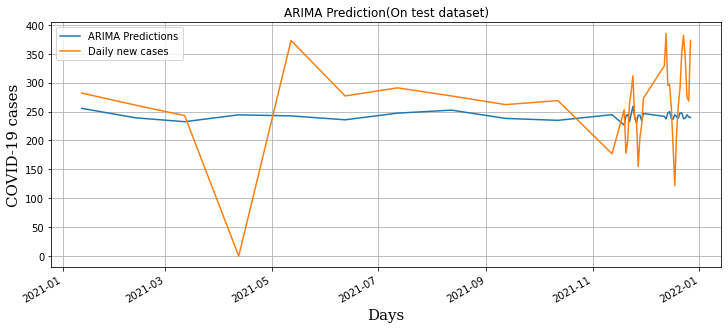

In [142]:
pred.plot(legend=True)
test['Daily new cases'].plot(figsize=(12,5),legend=True)
font2 = {'family':'serif','color':'black','size':15}

plt.title("ARIMA Prediction(On test dataset)")
plt.xlabel("Days", fontdict = font2)
plt.ylabel("COVID-19 cases", fontdict = font2)
plt.grid()

In [143]:
test['Daily new cases'].mean()

260.71794871794873

In [144]:
#rmse should be very less from mean
from sklearn.metrics import mean_squared_error
from math import sqrt

rmse=sqrt(mean_squared_error(pred,test['Daily new cases']))
print(rmse)

76.39299115054241


In [145]:
# Load specific evaluation tools
from sklearn.metrics import mean_squared_error
from statsmodels.tools.eval_measures import rmse

# Calculate root mean squared error
rmse(test["Daily new cases"], pred)


76.39299115054241

In [146]:
# Calculate mean squared error
mean_squared_error(test["Daily new cases"], pred)

5835.889096926852

In [147]:
#MAD
from statsmodels import robust
robust.mad(pred,c=1)

3.953112263894525

### future prediction

In [148]:
#from statsmodels.tsa.arima.model import ARIMA
model2=ARIMA(df['Daily new cases'],order=(5,1,5))
model2=model2.fit()
df.tail()

,Daily new cases
DATE,
2021-12-23,382.0
2021-12-24,342.0
2021-12-25,275.0
2021-12-26,268.0
2021-12-27,373.0


In [149]:
index_future_dates=pd.date_range(start='2021-12-23',end='2022-01-30')
#print(index_future_dates)
pred=model2.predict(start=len(df),end=len(df)+38,type='levels').rename('ARIMA Predictions')
#print(comp_pred)
pred.index=index_future_dates
print(pred)

#pred.plot(legend=True)
#test['Daily new cases'].plot(figsize=(12,5),legend=True)

2021-12-23    298.710503
2021-12-24    359.056641
2021-12-25    374.631665
2021-12-26    311.777489
2021-12-27    292.057214
2021-12-28    339.757300
2021-12-29    335.542934
2021-12-30    315.368737
2021-12-31    355.107432
2022-01-01    364.819931
2022-01-02    309.431435
2022-01-03    302.122381
2022-01-04    341.045795
2022-01-05    332.471174
2022-01-06    319.560413
2022-01-07    354.286879
2022-01-08    355.415630
2022-01-09    309.448836
2022-01-10    310.233967
2022-01-11    341.195414
2022-01-12    330.272007
2022-01-13    323.220381
2022-01-14    352.644313
2022-01-15    347.828767
2022-01-16    310.664079
2022-01-17    316.732615
2022-01-18    340.570620
2022-01-19    328.835954
2022-01-20    326.293607
2022-01-21    350.500697
2022-01-22    341.861430
2022-01-23    312.610917
2022-01-24    321.800789
2022-01-25    339.501132
2022-01-26    328.018092
2022-01-27    328.781116
2022-01-28    348.105519
2022-01-29    337.297895
2022-01-30    314.937993
Freq: D, Name: ARIMA Pred

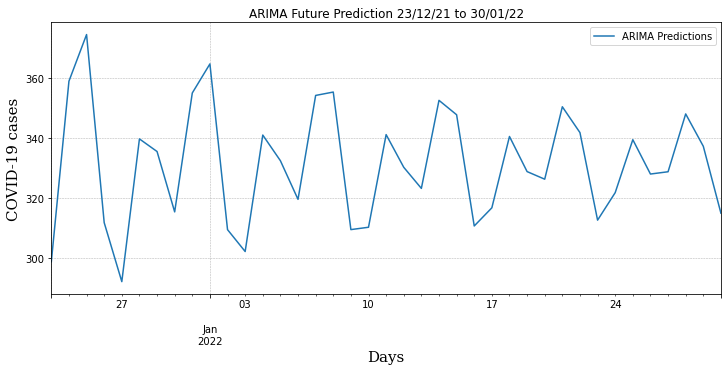

In [150]:
pred.plot(figsize=(12,5),legend=True)
font2 = {'family':'serif','color':'black','size':15}

plt.title("ARIMA Future Prediction 23/12/21 to 30/01/22")
plt.xlabel("Days", fontdict = font2)
plt.ylabel("COVID-19 cases", fontdict = font2)
plt.grid(linestyle = '--', linewidth = 0.5)

### lowest rmse value is better,it means prediction is more accurate

### There is no correct value for MSE. Simply put, the lower the value the better and 0 means the model is perfect

In [151]:
# Load specific evaluation tools
from sklearn.metrics import mean_squared_error
from statsmodels.tools.eval_measures import rmse
#from statsmodels.tools.eval_measures import mape

# Calculate root mean squared error
rmse(test["Daily new cases"], pred)



109.00712472746629

In [152]:
# Calculate mean squared error
mean_squared_error(test["Daily new cases"], pred)


11882.553241349393

In [153]:
test['Daily new cases'].mean()

260.71794871794873

In [154]:
from statsmodels import robust
robust.mad(pred,c=1)

15.334014305584788

In [155]:
import matplotlib.pyplot as plt

In [156]:
#slices = [12,25,50]
slices = [99.98, 99.97, 99.98]

In [157]:
activities = ['1st fold','2nd fold','3rd fold']

In [158]:
cols = ['c','m','g']

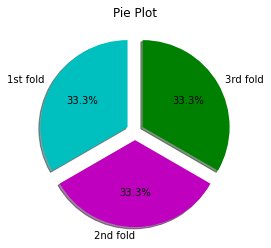

In [159]:
plt.pie(slices,labels=activities,colors=cols,startangle=90,shadow= True,explode=(0.1,0.1,0.1),autopct='%1.1f%%')

plt.title('Pie Plot')

plt.show()

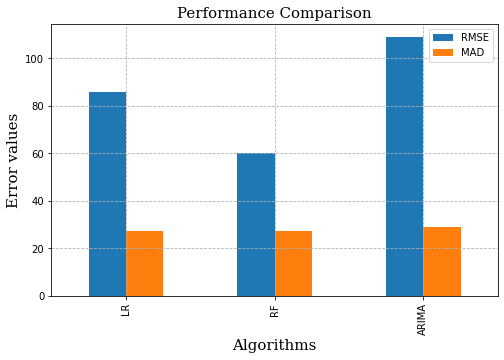

In [171]:

plotdata = pd.DataFrame({

    "RMSE":[85.8220,60.0083,109.0071],

    "MAD":[27.2361,27.1624,29.0]},

    index=["LR", "RF", "ARIMA"])

plotdata.plot(kind="bar",figsize=(8,5))
font2 = {'family':'serif','color':'black','size':15}
plt.title("Performance Comparison",fontdict = font2)

plt.xlabel("Algorithms",fontdict = font2)
plt.ylabel("Error values",fontdict = font2)
plt.grid(linestyle = '--')